<a href="https://colab.research.google.com/github/yoshimethod/tutorials/blob/main/bioinformatics_pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
inf=pd.read_csv('/content/drive/MyDrive/bioinformatics.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-17-d619c990d415>:4: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  inf=pd.read_csv('/content/drive/MyDrive/bioinformatics.csv')


In [18]:
selected = pd.read_csv("/content/drive/MyDrive/bioinformatics.csv", usecols=['age_at_diagnosis', 'cancer_type_detailed', 'cellularity', 'er_status', 'her2_status', 'her2_status', 'tumor_stage', 'overall_survival', 'brca1', 'brca2'])
selected.head()

,age_at_diagnosis,cancer_type_detailed,cellularity,er_status,her2_status,overall_survival,tumor_stage,brca1,brca2
0,75.65,Breast Invasive Ductal Carcinoma,NaN,Positive,Negative,1,2.0,-1.3990,-0.5738
1,43.19,Breast Invasive Ductal Carcinoma,High,Positive,Negative,1,1.0,-1.3800,0.2777
2,48.87,Breast Invasive Ductal Carcinoma,High,Positive,Negative,0,2.0,0.0670,-0.8426
3,47.68,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Positive,Negative,1,2.0,0.6744,-0.5428
4,76.97,Breast Mixed Ductal and Lobular Carcinoma,High,Positive,Negative,0,2.0,1.2932,-0.9039


In [19]:
#データの行数、列数を確認する
selected.shape
#データ型を確認する
selected.dtypes
#カラム名を取得する
selected.columns
#以上の３つのコードで得られる内容をまとめて取得する
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_at_diagnosis      1904 non-null   float64
 1   cancer_type_detailed  1889 non-null   object 
 2   cellularity           1850 non-null   object 
 3   er_status             1904 non-null   object 
 4   her2_status           1904 non-null   object 
 5   overall_survival      1904 non-null   int64  
 6   tumor_stage           1403 non-null   float64
 7   brca1                 1904 non-null   float64
 8   brca2                 1904 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 134.0+ KB


In [20]:
selected.describe()

,age_at_diagnosis,overall_survival,tumor_stage,brca1,brca2
count,1904.000000,1904.000000,1403.000000,1.904000e+03,1.904000e+03
mean,61.087054,0.420693,1.750535,-6.302521e-07,-4.201681e-07
std,12.978711,0.493800,0.628999,1.000262e+00,1.000262e+00
min,21.930000,0.000000,0.000000,-2.444400e+00,-2.783500e+00
25%,51.375000,0.000000,1.000000,-7.198500e-01,-6.994750e-01
50%,61.770000,0.000000,2.000000,-1.244500e-01,-5.820000e-02
75%,70.592500,1.000000,2.000000,5.532250e-01,6.290000e-01
max,96.290000,1.000000,4.000000,4.554200e+00,3.737900e+00


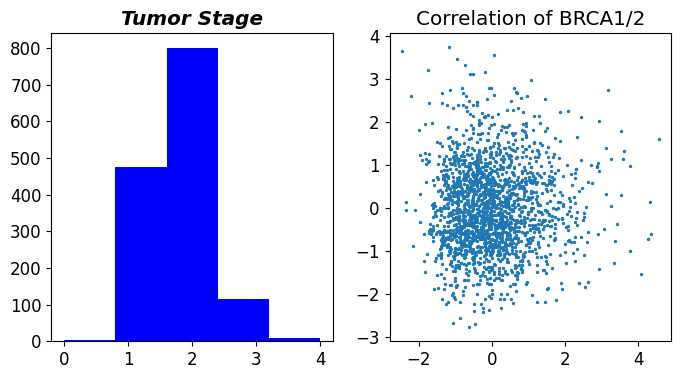

In [24]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=12
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax1.set_title(label='Tumor Stage', style='italic', weight='bold')
ax1.hist(selected['tumor_stage'], bins=5, color='b')
ax2=fig.add_subplot(1,2,2,title='Correlation of BRCA1/2')
ax2.scatter(selected['brca1'], selected['brca2'], s=2)

In [25]:
!pip install lifelines
from lifelines import KaplanMeierFitter

breast=pd.read_csv('/content/drive/MyDrive/bioinformatics.csv', encoding='cp932', usecols=['overall_survival_months', 'her2_status', 'overall_survival'])
breast.info()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=9f5803720110494b5447b8d7ae3707adfc44fa6d949623a619127a087c8c25fb
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   her2_status              1904 non-null   object 
 1   overall_survival_months  1904 non-null   float64
 2   overall_survival         1904 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 44.8+ KB


<Axes: xlabel='brca1', ylabel='brca2'>

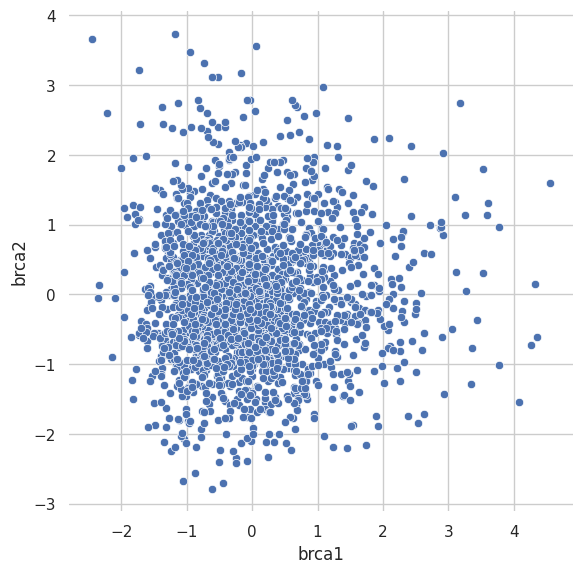

In [33]:
import seaborn as sns
complete=pd.read_csv('/content/drive/MyDrive/bioinformatics.csv', low_memory=False)
sns.set_theme(style='whitegrid')
f, ax=plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='brca1', y='brca2', data=complete)

<Axes: >

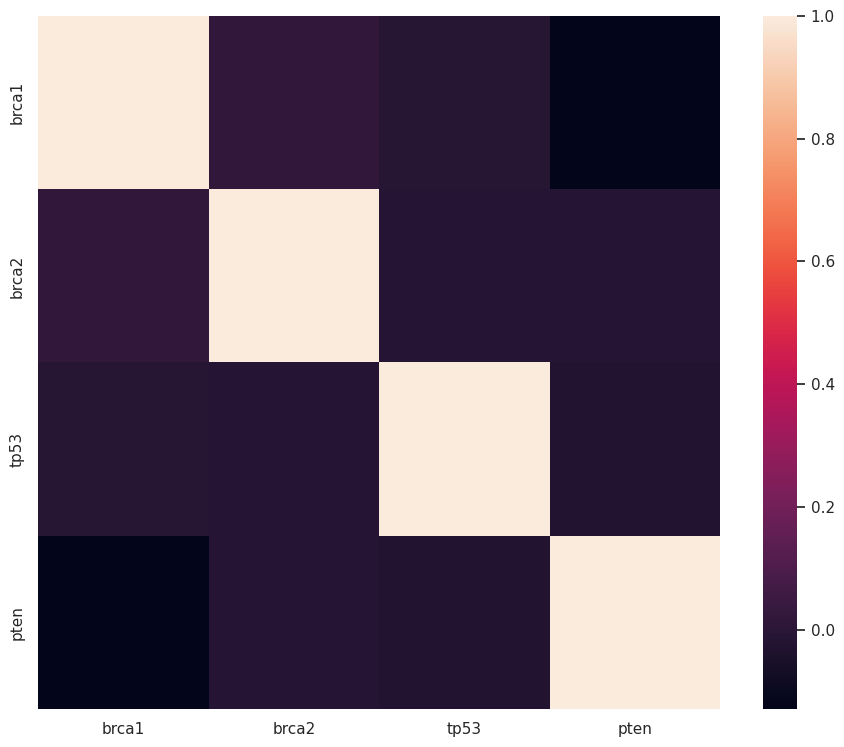

In [34]:
heatmap=complete[['brca1', 'brca2', 'tp53', 'pten']]
corr=heatmap.corr()
f, ax=plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

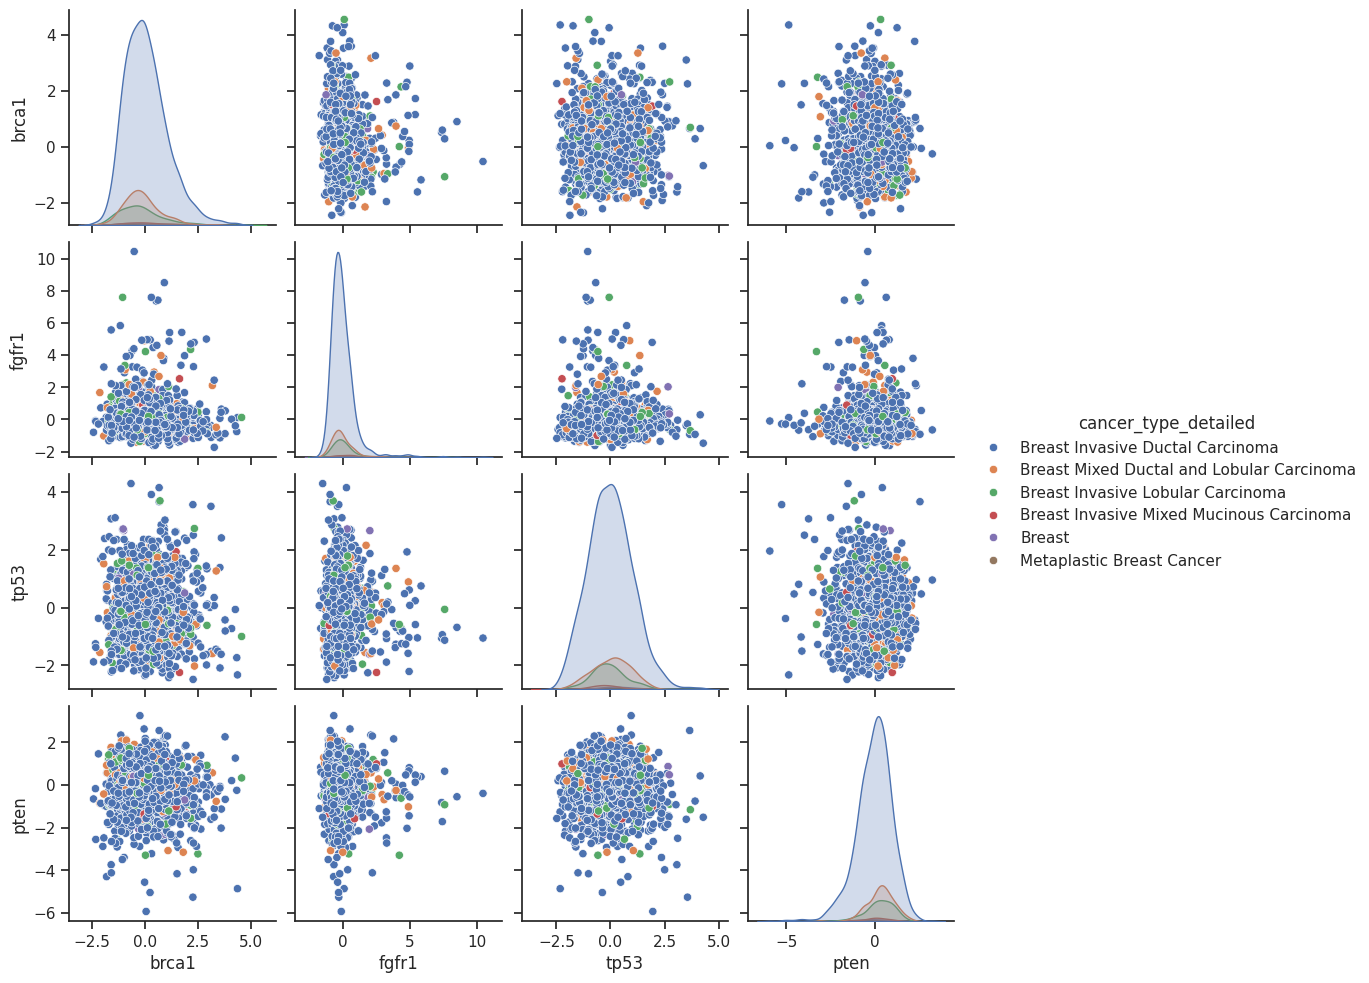

In [36]:
sns.set_theme(style='ticks')
scatterplot=complete[['cancer_type_detailed', 'brca1', 'fgfr1', 'tp53', 'pten']]
sns.pairplot(scatterplot, hue='cancer_type_detailed')